<a href="https://colab.research.google.com/github/faiz-muhtasim/Data-Science-Project/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Group 4
# Student 1 Name : Faiz Muhtasim, ID : 22101528
# Student 2 Name : Kazi Anika Bushra, ID : 22101678
# ML Project on Messy-Food_Waste

In [ ]:
# Step 1: Upload and Load the Dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [ ]:
# Check missing values
print("🔍 Missing values in each column:")
print(df.isnull().sum())

🔍 Missing values in each column:
ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64


In [ ]:
#EDA
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))
print("=====================================================================================================================")
df.info()
print("=====================================================================================================================")
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

Shape of the dataset is (911, 12). This dataset contains 911 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  911 non-null    int64  
 10  waste_category    911 non-null    int64  
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(7), object(1)
memory usage: 85.5+ KB
There are 11 numerical features: 

['ID', 'meals_served', 'kitchen_staff', 'temperature_C', 

In [ ]:
# Assuming df is your full dataset
numerical_data = df.select_dtypes(include=['int64', 'float64'])  # selects only numeric columns

# Now calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Display the matrix
correlation_matrix

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
ID,1.000000,-0.012605,-0.028697,0.047744,0.002652,0.028893,0.005462,0.039278,-0.020233
meals_served,-0.012605,1.000000,-0.028022,-0.019706,-0.041477,0.026719,-0.000387,-0.063700,0.852128
kitchen_staff,-0.028697,-0.028022,1.000000,-0.020965,-0.021430,0.034494,-0.001107,-0.079861,0.007192
temperature_C,0.047744,-0.019706,-0.020965,1.000000,-0.011916,0.021189,-0.006800,-0.021711,-0.015911
humidity_percent,0.002652,-0.041477,-0.021430,-0.011916,1.000000,0.015120,0.018948,0.016266,-0.021793
day_of_week,0.028893,0.026719,0.034494,0.021189,0.015120,1.000000,-0.041240,0.000472,0.008090
special_event,0.005462,-0.000387,-0.001107,-0.006800,0.018948,-0.041240,1.000000,0.009663,0.118757
past_waste_kg,0.039278,-0.063700,-0.079861,-0.021711,0.016266,0.000472,0.009663,1.000000,0.260767
food_waste_kg,-0.020233,0.852128,0.007192,-0.015911,-0.021793,0.008090,0.118757,0.260767,1.000000


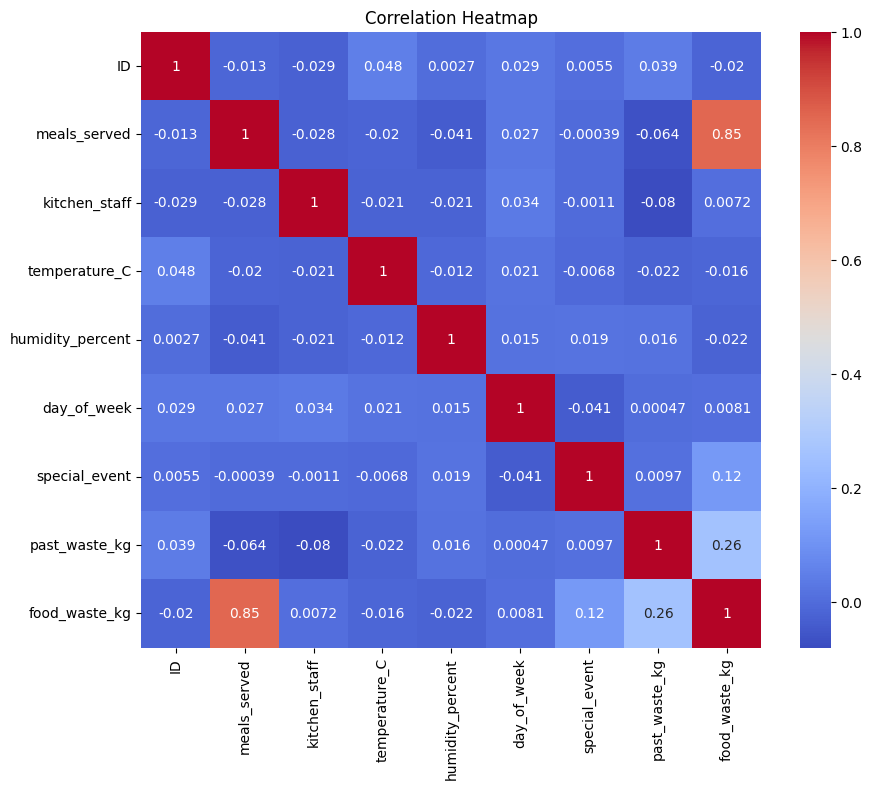

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 2: Handle Missing Values
# Fill missing 'staff_experience' with the most common value
most_common = df['staff_experience'].mode()[0]
df['staff_experience'].fillna(most_common, inplace=True)

<ipython-input-8-b41be9ff7c21>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['staff_experience'].fillna(most_common, inplace=True)


In [ ]:
# Step 3: Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

le_exp = LabelEncoder()
le_cat = LabelEncoder()
df['staff_experience'] = le_exp.fit_transform(df['staff_experience'])
df['waste_category'] = le_cat.fit_transform(df['waste_category'])

In [ ]:
# Step 4: Drop Unnecessary Columns & Normalize Features
df.drop(columns=['ID', 'date'], inplace=True)

from sklearn.preprocessing import MinMaxScaler
X = df.drop(columns=['food_waste_kg'])
y = df['food_waste_kg']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Split Features and Target
X = df.drop(columns=['food_waste_kg'])
y = df['food_waste_kg']

In [ ]:
# Step 6: Train-Test Split (Regression)(70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("✅ Dataset split: 70% train, 30% test")

✅ Dataset split: 70% train, 30% test


In [ ]:
# Step 7: Regression Model Training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
}

reg_results = {}
for name, model in reg_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    reg_results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.2f}")

Linear Regression: R² = 0.8550, MSE = 132.84
Decision Tree: R² = 0.8664, MSE = 122.41
Neural Network: R² = 0.8822, MSE = 107.91


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


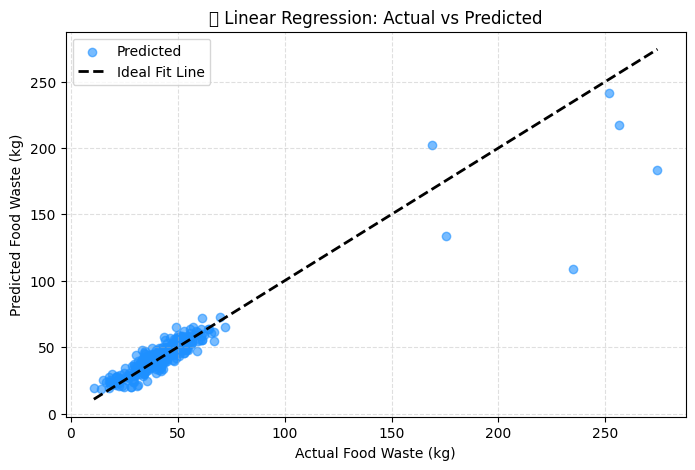

In [ ]:
# Linear Regression – Best Fit Line (Regression Task)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Re-train Linear Regression just in case
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds_lin = lin_reg.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, preds_lin, color='dodgerblue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit Line")
plt.xlabel("Actual Food Waste (kg)")
plt.ylabel("Predicted Food Waste (kg)")
plt.title("📉 Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [ ]:
# Step 8: Classification Dataset & Split
y_class = (y > y.median()).astype(int)  # 1 = High waste, 0 = Low
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

In [ ]:
# Step 9: Classification Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve

clf_models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
}

clf_results = {}
for name, model in clf_models.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    probs = model.predict_proba(X_test_c)[:, 1]
    cm = confusion_matrix(y_test_c, preds)
    auc = roc_auc_score(y_test_c, probs)
    report = classification_report(y_test_c, preds, output_dict=True)
    acc = accuracy_score(y_test_c, preds)
    clf_results[name] = {
        "confusion_matrix": cm,
        "roc_auc": auc,
        "precision": report["1"]["precision"],
        "recall": report["1"]["recall"],
        "accuracy": acc
    }
    print(f"{name}: Accuracy={acc:.2f}, Precision={report['1']['precision']:.2f}, Recall={report['1']['recall']:.2f}, AUC={auc:.2f}")

Logistic Regression: Accuracy=0.79, Precision=0.76, Recall=0.82, AUC=0.86
Naive Bayes: Accuracy=0.74, Precision=0.92, Recall=0.51, AUC=0.88
Neural Network: Accuracy=0.84, Precision=0.84, Recall=0.83, AUC=0.94


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


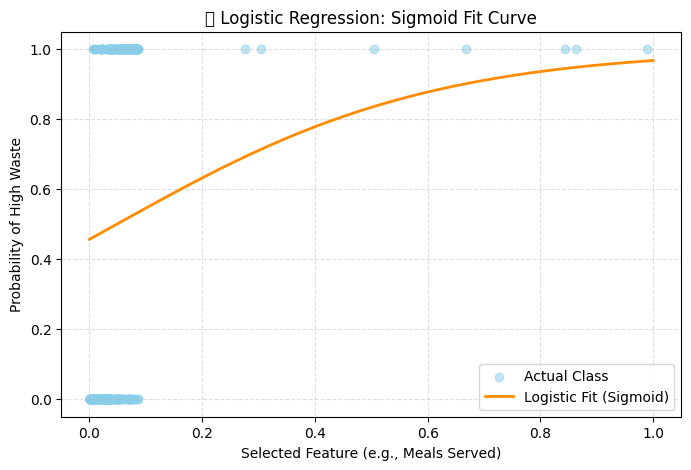

In [ ]:
# Logistic Regression – Best Fit Curve (Classification Task)
import numpy as np
from sklearn.linear_model import LogisticRegression

# Use only one feature for 2D visualization (e.g., past_waste_kg)
X_vis = X_scaled[:, 0].reshape(-1, 1)  # example: column 0
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_class, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_v, y_train_v)

# Plot sigmoid curve
x_vals = np.linspace(X_vis.min(), X_vis.max(), 300).reshape(-1, 1)
y_probs = log_reg.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X_test_v, y_test_v, color='skyblue', label='Actual Class', alpha=0.5)
plt.plot(x_vals, y_probs, color='darkorange', linewidth=2, label='Logistic Fit (Sigmoid)')
plt.xlabel("Selected Feature (e.g., Meals Served)")
plt.ylabel("Probability of High Waste")
plt.title("📈 Logistic Regression: Sigmoid Fit Curve")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Neural Network: Accuracy = 0.84


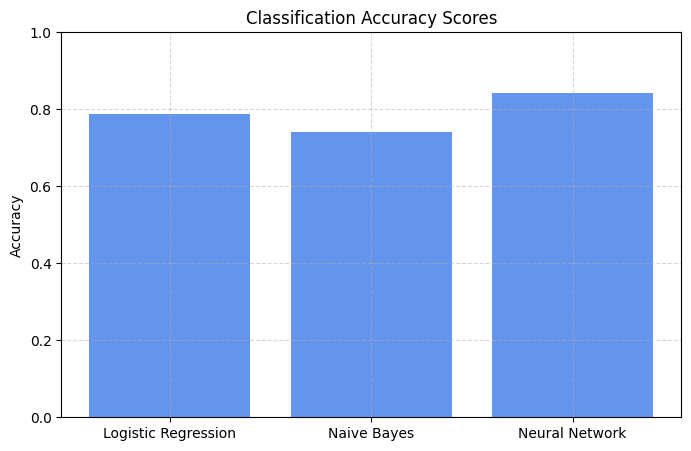

In [ ]:
# Step 10: Classification Comparisons & Visualization
# Bar Chart: Accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test_c, preds)
print(f"{name}: Accuracy = {acc:.2f}")
# Bar chart for accuracy scores of all classification models
import matplotlib.pyplot as plt

acc_scores = [clf_results[m]["accuracy"] for m in clf_models]
plt.figure(figsize=(8, 5))
plt.bar(clf_models.keys(), acc_scores, color='cornflowerblue')
plt.title("Classification Accuracy Scores")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("📊 Precision, Recall, and F1 Score for Each Classification Model:\n")

for name, model in clf_models.items():
    preds = model.predict(X_test_c)

    precision = precision_score(y_test_c, preds)
    recall = recall_score(y_test_c, preds)
    f1 = f1_score(y_test_c, preds)

    print(f"{name}:")
    print(f"  🔹 Precision: {precision:.4f}")
    print(f"  🔹 Recall:    {recall:.4f}")
    print(f"  🔹 F1 Score:  {f1:.4f}\n")

📊 Precision, Recall, and F1 Score for Each Classification Model:

Logistic Regression:
  🔹 Precision: 0.7622
  🔹 Recall:    0.8195
  🔹 F1 Score:  0.7899

Naive Bayes:
  🔹 Precision: 0.9189
  🔹 Recall:    0.5113
  🔹 F1 Score:  0.6570

Neural Network:
  🔹 Precision: 0.8409
  🔹 Recall:    0.8346
  🔹 F1 Score:  0.8377



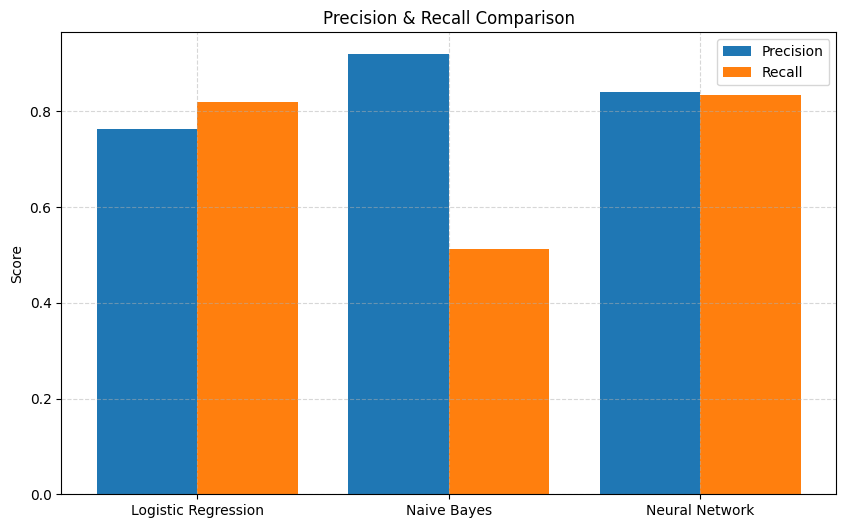

In [ ]:
# Bar Chart: Precision & Recall
precisions = [clf_results[m]['precision'] for m in clf_models]
recalls = [clf_results[m]['recall'] for m in clf_models]
x = range(len(clf_models))
plt.figure(figsize=(10, 6))
plt.bar(x, precisions, width=0.4, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], recalls, width=0.4, label='Recall', align='center')
plt.xticks([i + 0.2 for i in x], clf_models.keys())
plt.title("Precision & Recall Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

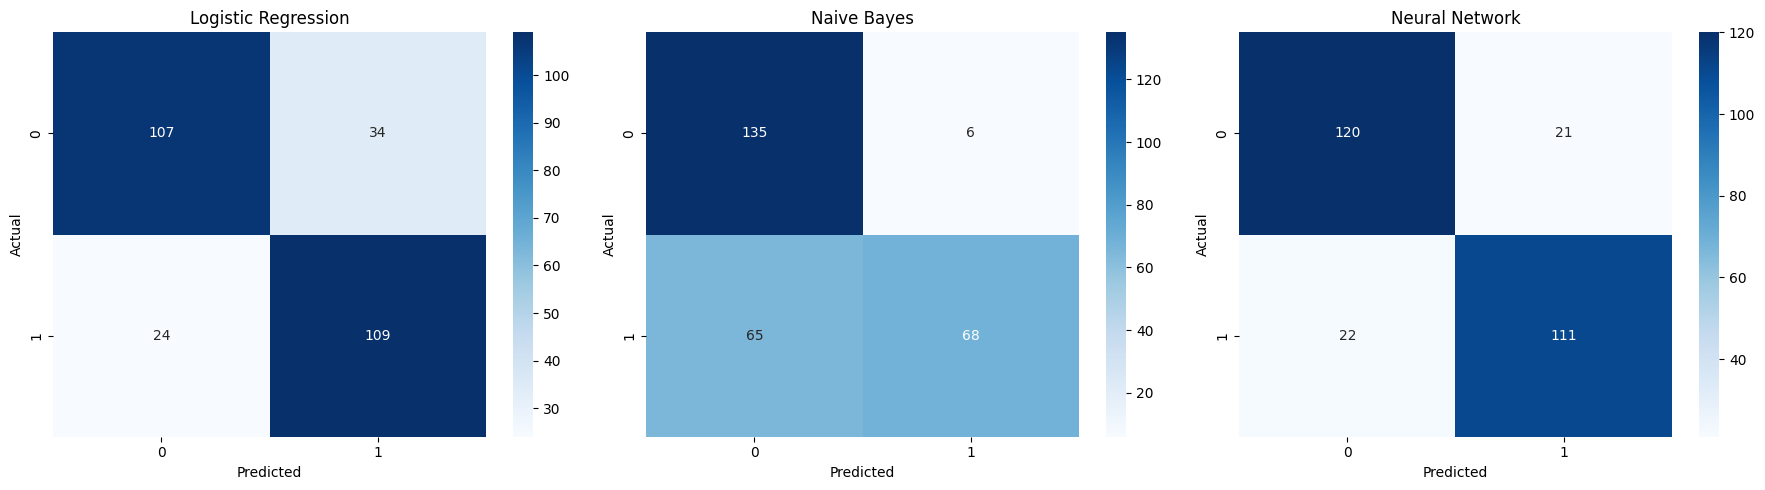

In [ ]:
# Confusion Matrices
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (model, data) in enumerate(clf_results.items()):
    sns.heatmap(data["confusion_matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{model}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# AUC Scores
from sklearn.metrics import roc_auc_score

print("🔍 AUC Scores for Classification Models:\n")
for name, model in clf_models.items():
    probs = model.predict_proba(X_test_c)[:, 1]  # Probability estimates
    auc = roc_auc_score(y_test_c, probs)
    print(f"{name}: AUC Score = {auc:.4f}")

🔍 AUC Scores for Classification Models:

Logistic Regression: AUC Score = 0.8649
Naive Bayes: AUC Score = 0.8832
Neural Network: AUC Score = 0.9352


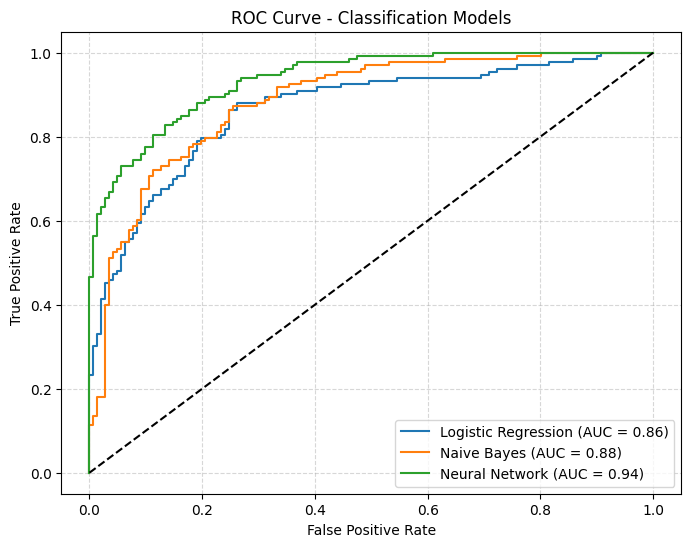

In [ ]:
# ROC Curve
plt.figure(figsize=(8, 6))
for name in clf_models:
    probs = clf_models[name].predict_proba(X_test_c)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_c, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {clf_results[name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classification Models")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

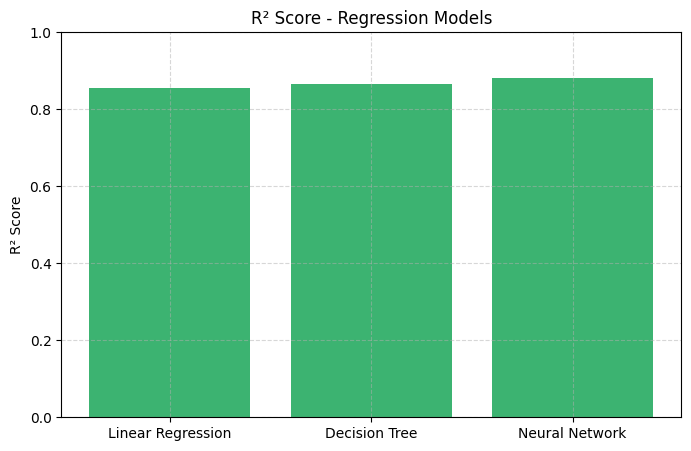

In [ ]:
# Step 11: Regression R² and MSE Comparison
# R² Score
r2_vals = [reg_results[m]['R2'] for m in reg_models]
plt.figure(figsize=(8, 5))
plt.bar(reg_models.keys(), r2_vals, color='mediumseagreen')
plt.title("R² Score - Regression Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

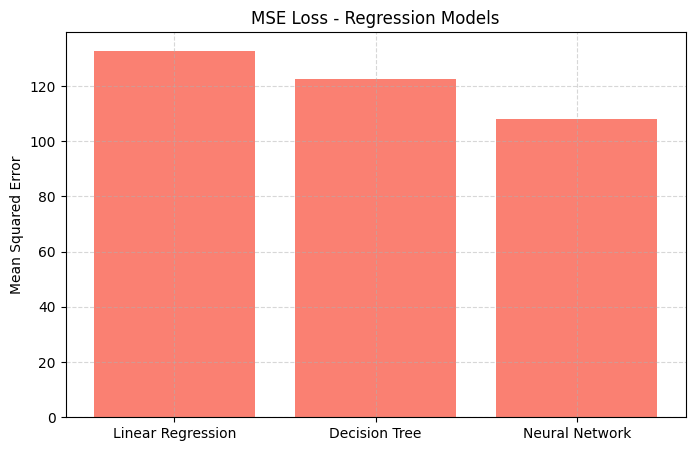

In [ ]:
# MSE (Loss)
mse_vals = [reg_results[m]['MSE'] for m in reg_models]
plt.figure(figsize=(8, 5))
plt.bar(reg_models.keys(), mse_vals, color='salmon')
plt.title("MSE Loss - Regression Models")
plt.ylabel("Mean Squared Error")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# --- REGRESSION: Pick best model based on R² Score ---
best_reg_model = max(reg_results.items(), key=lambda x: x[1]['R2'])
print(f"🏆 Best Regression Model: {best_reg_model[0]}")
print(f"   🔹 R² Score: {best_reg_model[1]['R2']:.4f}")
print(f"   🔹 MSE: {best_reg_model[1]['MSE']:.2f}")

# --- CLASSIFICATION: Pick best model based on F1 Score ---
f1_scores = {}
for name, model in clf_models.items():
    preds = model.predict(X_test_c)
    f1 = f1_score(y_test_c, preds)
    f1_scores[name] = f1

best_clf_model = max(f1_scores.items(), key=lambda x: x[1])
print(f"\n🏆 Best Classification Model: {best_clf_model[0]}")
print(f"   🔹 F1 Score: {best_clf_model[1]:.4f}")

🏆 Best Regression Model: Neural Network
   🔹 R² Score: 0.8822
   🔹 MSE: 107.91

🏆 Best Classification Model: Neural Network
   🔹 F1 Score: 0.8377
